In [1]:
import warnings
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import json
import operator
import copy, random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi


warnings.filterwarnings('ignore')


# Step 0: Provide the path to the experiments

In [2]:
your_path = '/home/rachel-baker/Desktop'
path = "{}/valentine-paper-results/data/".format(your_path)

# Step 1: Rename files 
> **Note**: Only run this if you have new results

In [3]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir(path+folder):
        filename = folder+'/'+file
        if filename.endswith(".json"):
            files.append('.'.join(filename.split('.')[:-1]))
            
for f in files:
    g = f.replace('EmbDI_with_cid_all_with_rid_first_flatten_all_', "EmbDI{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}")
    g = g.replace('evCupid','ev__Cupid')
    g = g.replace('__CorrelationClustering','__DistributionBased')
    g = g.replace('evSimilarityFlooding','ev__SimilarityFlooding')
    g = g.replace('evJaccardLevenMatcher','ev__JaccardLevenMatcher')
    if 'COMA_OPT_INST' in g:
        g = g.replace('__Coma','__COMA-SI')
    else:
        g = g.replace('__Coma','__COMA-S')


#     print(g)
    os.rename(path+f+'.json',path+g+'.json')

# Step 2: Read files


Parse the result files and present a table with the precision and recall metrics for all the experiments

for every algorithm create a plot for each metric

Code below read the output of the framework and creates a dict of metrics.

In [5]:
total_metrics = {}
run_times = {}

def show_the_output(path: str):
    
    with open('%s'%(path),'r') as input:
        split_path = path.split('/')
        filename = '.'.join(split_path[len(split_path)-1].split('.')[:-1])
        lines = json.load(input)
        total_metrics[filename] = lines['metrics']
        run_times[filename] = lines['run_times']['total_time']
        

In [6]:
files = []
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue
    for file in os.listdir("{}{}".format(path, folder)):
        filename = path+folder+'/'+file
        if filename.endswith(".json"):
            files.append(filename)

files.sort()
for file in tqdm(files):
    try:
        show_the_output(file)
    except:
        raise Exception(file)



100%|██████████| 70145/70145 [00:08<00:00, 8663.95it/s] 


# Step 3: Create data

In [8]:
def find_best_config_dict(source_dict: dict, target_dict: dict, to_table: dict):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            max_item = max(source_dict[key][algo].items(), key=operator.itemgetter(1))
            target_dict[key][algo] = max_item[0]
            to_table[key][algo] = max_item[1]

def get_best_metric(source_dict: dict, target_dict: dict, index):
    for key in source_dict.keys():
        for algo in source_dict[key].keys():
            target_dict[key][algo] = source_dict[key][algo][index[key][algo]]
            
def add_variable_columns(frame: pd.DataFrame, category: list, mother_table: list, way: list, 
                         horizontal_overlap: list, vertical_overlap: list, column_names: list, typeOfValues: list):
    frame['Category'] = category
    frame['MotherTable'] = mother_table
    frame['SplitMethod'] = way
    frame['HorizontalOverlap'] = horizontal_overlap
    frame['VerticalOverlap'] = vertical_overlap
    frame['ColumnNames'] = column_names
    frame['TypeOfValues'] = typeOfValues

In [9]:
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = -1


precision = {}
recall = {}
f1_score = {}
precision_at_10_percent = {}
precision_at_20_percent = {}
precision_at_30_percent = {}
precision_at_40_percent = {}
precision_at_50_percent = {}
precision_at_60_percent = {}
precision_at_70_percent = {}
precision_at_80_percent = {}
precision_at_90_percent = {}
recall_at_sizeof_ground_truth = {}
run_time = {}

 
algorithms = {
    'Cupid': None,
    'DistributionBased': None,
    'SimilarityFlooding': None,
    'SemProp': None,
    'JaccardLevenMatcher':None,
    'COMA-S': None,
    'COMA-SI': None,
    'EmbDI': None,
    'ContinuousQualityMatcher': None,
    'DiscreteQualityMatcher': None
}

problem_dictionary = {
    'Unionable': ['horizontal','unionable'],
    'View-Unionable': ['both_0_', 'viewunion'],
    'Joinable': ['both_50_', 'vertical','_joinable'],
    'Semantically-Joinable': ['both_50_','vertical','_semjoinable'] # TODO: change with the correct file convention
}



for key in total_metrics.keys():
    precision[key.split('__')[0]] = {}
    recall[key.split('__')[0]] = {}
    f1_score[key.split('__')[0]] = {}
    precision_at_10_percent[key.split('__')[0]] = {}
    precision_at_20_percent[key.split('__')[0]] = {}
    precision_at_30_percent[key.split('__')[0]] = {}
    precision_at_40_percent[key.split('__')[0]] = {}
    precision_at_50_percent[key.split('__')[0]] = {}
    precision_at_60_percent[key.split('__')[0]] = {}
    precision_at_70_percent[key.split('__')[0]] = {}
    precision_at_80_percent[key.split('__')[0]] = {}
    precision_at_90_percent[key.split('__')[0]] = {}
    recall_at_sizeof_ground_truth[key.split('__')[0]] = {}
    run_time[key.split('__')[0]] = {}

        
for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}
        run_time[key.split('__')[0]][key.split('__')[1].split('{')[0]] = {}


for key in total_metrics.keys():
    if not "precision_at_n_percent" in total_metrics[key].keys():
        precision[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision']
        recall[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall']
        f1_score[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['f1_score']
        precision_at_10_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_10_percent']
        precision_at_20_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_20_percent']
        precision_at_30_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_30_percent']
        precision_at_40_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_40_percent']
        precision_at_50_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_50_percent']
        precision_at_60_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_60_percent']
        precision_at_70_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_70_percent']
        precision_at_80_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_80_percent']
        precision_at_90_percent[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['precision_at_90_percent']
        recall_at_sizeof_ground_truth[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = total_metrics[key]['recall_at_sizeof_ground_truth']
        run_time[key.split('__')[0]][key.split('__')[1].split('{')[0]]['{'+key.split('__')[1].split('{')[1]] = run_times[key]


best_dict = {}
for dataset in precision.keys():
    best_dict[dataset] = copy.deepcopy(algorithms)
    
best_table = copy.deepcopy(best_dict)
find_best_config_dict(f1_score,best_dict,best_table)

# print('\n\nBest Configuration 1-1\n')
best_configuration_121 = pd.DataFrame.from_dict(best_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
# display(best_configuration_121)

# print('\n\nPrecision\n')
best_prec_dict = copy.deepcopy(best_dict)
get_best_metric(precision,best_prec_dict,best_dict)

# display(best_prec_dict)
best_prec_pd = pd.DataFrame.from_dict(best_prec_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
shape = best_prec_pd.shape
random_list = np.random.uniform(low=0, high=1, size=shape[0])
for i in best_prec_pd.columns:
    m = best_prec_pd[i].isnull()
    #count rows with NaNs
    l = m.sum()
    #create array with size l
    s = np.random.choice(random_list, size=l)
    #set NaNs values
    best_prec_pd.loc[m, i] = s
    

In [10]:
best_prec_pd

,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher
0,Musicians_joinable,0.750000,0.857143,1.000000,0.741688,1.000000,0.555556,0.666667,0.545455,0.857143,1.000000
1,Musicians_semjoinable,0.777778,0.750000,0.500000,0.150204,0.777778,0.714286,0.888889,0.583333,1.000000,1.000000
2,Musicians_unionable,1.000000,0.947368,0.944444,0.565875,0.950000,1.000000,1.000000,0.947368,0.944444,0.944444
3,Musicians_viewunion,0.750000,0.571429,0.384615,0.346172,0.625000,0.555556,0.555556,0.375000,0.333333,0.666667
4,assays_both_0_1_ac1_av,1.000000,0.000000,0.000000,0.333333,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.500000,1.000000,0.615385,0.486448,1.000000,0.800000,0.933333,0.875000,1.000000,1.000000
540,prospect_vertical_70_ac5_av,0.875000,0.916667,0.823529,0.704256,0.933333,1.000000,1.000000,0.416667,0.833333,0.666667
541,prospect_vertical_70_ac5_ev,0.857143,0.937500,0.666667,0.579747,0.937500,1.000000,0.937500,0.812500,0.937500,0.937500
542,prospect_vertical_70_ec_av,1.000000,0.916667,0.882353,0.971414,0.928571,0.937500,0.937500,0.687500,0.666667,0.666667


In [11]:
category = []
mother_table = []
way = []
column_names = []
typeOfValues = []
horizontal_overlap = []
vertical_overlap = []

for index, dataset in best_prec_pd.loc[:,['Dataset']].iterrows():
    for problem in problem_dictionary.keys():
        for ss in problem_dictionary[problem]:
            if ss in dataset['Dataset']:
                if (problem == 'Joinable' and '_ev' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif (problem == 'Semantically-Joinable' and '_av' in dataset['Dataset']) or 'Musicians' in dataset['Dataset']:
                    category.append(problem)
                elif not (problem == 'Joinable' or problem == 'Semantically-Joinable'):
                    category.append(problem)
            
    variables = dataset['Dataset'].split('_')
#     print(variables)
#     print(variables[1] == 'both')
    mother_table.append(variables[0])
    if variables[1] == 'both':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(variables[3])
        column_names.append(variables[4])
        typeOfValues.append(variables[5])
    elif variables[1] == 'horizontal':
        way.append(variables[1])
        horizontal_overlap.append(variables[2])
        vertical_overlap.append(None)
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    elif variables[1] == 'vertical':
        way.append(variables[1])
        horizontal_overlap.append(None)
        vertical_overlap.append(variables[2])
        column_names.append(variables[3])
        typeOfValues.append(variables[4])
    else:
        way.append(None)
        horizontal_overlap.append(None)
        vertical_overlap.append(None)
        column_names.append(None)
        typeOfValues.append(None)

add_variable_columns(best_prec_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec_pd.fillna(value=pd.np.nan, inplace=True)
best_prec_pd

,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.750000,0.857143,1.000000,0.741688,1.000000,0.555556,0.666667,0.545455,0.857143,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.777778,0.750000,0.500000,0.150204,0.777778,0.714286,0.888889,0.583333,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,1.000000,0.947368,0.944444,0.565875,0.950000,1.000000,1.000000,0.947368,0.944444,0.944444,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.750000,0.571429,0.384615,0.346172,0.625000,0.555556,0.555556,0.375000,0.333333,0.666667,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,1.000000,0.000000,0.000000,0.333333,0.500000,0.333333,0.000000,0.000000,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.500000,1.000000,0.615385,0.486448,1.000000,0.800000,0.933333,0.875000,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.875000,0.916667,0.823529,0.704256,0.933333,1.000000,1.000000,0.416667,0.833333,0.666667,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.857143,0.937500,0.666667,0.579747,0.937500,1.000000,0.937500,0.812500,0.937500,0.937500,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,1.000000,0.916667,0.882353,0.971414,0.928571,0.937500,0.937500,0.687500,0.666667,0.666667,Semantically-Joinable,prospect,vertical,NaN,70,ec,av


In [12]:
print('\n\nRecall\n')
best_recall_dict = copy.deepcopy(best_dict)
get_best_metric(recall,best_recall_dict,best_dict)
best_recall_pd = pd.DataFrame.from_dict(best_recall_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_recall_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_recall_pd.fillna(value=pd.np.nan, inplace=True)
display(best_recall_pd)

print('\n\nF1_score\n')
best_f1_dict = copy.deepcopy(best_dict)
get_best_metric(f1_score,best_f1_dict,best_dict)
best_f1_pd = pd.DataFrame.from_dict(best_f1_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_f1_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_f1_pd.fillna(value=pd.np.nan, inplace=True)
display(best_f1_pd)

nm_table = copy.deepcopy(best_dict)
nm_dict = copy.deepcopy(best_dict)
find_best_config_dict(recall_at_sizeof_ground_truth,nm_dict,nm_table)

print('\n\nBest Configuration n-m\n')
best_configuration_nm = pd.DataFrame.from_dict(nm_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
display(best_configuration_nm)

print('\n\nPrecision at 10 percent\n')
best_prec10_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_10_percent,best_prec10_dict,nm_dict)
best_prec10_pd = pd.DataFrame.from_dict(best_prec10_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec10_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec10_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec10_pd)

print('\n\nPrecision at 20 percent\n')
best_prec20_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_20_percent,best_prec20_dict,nm_dict)
best_prec20_pd = pd.DataFrame.from_dict(best_prec20_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec20_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec20_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec20_pd)

print('\n\nPrecision at 30 percent\n')
best_prec30_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_30_percent,best_prec30_dict,nm_dict)
best_prec30_pd = pd.DataFrame.from_dict(best_prec30_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec30_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec30_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec30_pd)

print('\n\nPrecision at 40 percent\n')
best_prec40_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_40_percent,best_prec40_dict,nm_dict)
best_prec40_pd = pd.DataFrame.from_dict(best_prec40_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec40_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec40_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec40_pd)

print('\n\nPrecision at 50 percent\n')
best_prec50_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_50_percent,best_prec50_dict,nm_dict)
best_prec50_pd = pd.DataFrame.from_dict(best_prec50_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec50_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec50_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec50_pd)

print('\n\nPrecision at 60 percent\n')
best_prec60_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_60_percent,best_prec60_dict,nm_dict)
best_prec60_pd = pd.DataFrame.from_dict(best_prec60_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec60_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec60_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec60_pd)

print('\n\nPrecision at 70 percent\n')
best_prec70_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_70_percent,best_prec70_dict,nm_dict)
best_prec70_pd = pd.DataFrame.from_dict(best_prec70_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec70_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec70_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec70_pd)

print('\n\nPrecision at 80 percent\n')
best_prec80_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_80_percent,best_prec80_dict,nm_dict)
best_prec80_pd = pd.DataFrame.from_dict(best_prec80_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec80_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec80_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec80_pd)

print('\n\nPrecision at 90 percent\n')
best_prec90_dict = copy.deepcopy(nm_dict)
get_best_metric(precision_at_90_percent,best_prec90_dict,nm_dict)
best_prec90_pd = pd.DataFrame.from_dict(best_prec90_dict, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_prec90_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_prec90_pd.fillna(value=pd.np.nan, inplace=True)
display(best_prec90_pd)

print('\n\nRecall at sizeof groundtruth\n')
best_rec_gnd_pd = pd.DataFrame.from_dict(nm_table, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_rec_gnd_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)
best_rec_gnd_pd.fillna(value=pd.np.nan, inplace=True)
display(best_rec_gnd_pd)

best_run_time = copy.deepcopy(nm_dict)
get_best_metric(run_time, best_run_time, nm_dict)
best_run_time_pd = pd.DataFrame.from_dict(best_run_time, orient='index').reset_index().rename(columns={"index": "Dataset"})
add_variable_columns(best_run_time_pd,category,mother_table,way,horizontal_overlap,vertical_overlap,column_names, typeOfValues)



Recall



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.500000,1.000000,0.500000,NaN,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.875000,0.750000,0.750000,NaN,0.875000,0.625000,1.000000,0.875000,0.500000,0.750000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.900000,0.900000,0.850000,NaN,0.950000,0.600000,0.850000,0.900000,0.850000,0.850000,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.500000,0.666667,0.833333,NaN,0.833333,0.833333,0.833333,0.500000,0.166667,0.333333,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.400000,1.000000,0.533333,NaN,1.000000,0.266667,0.933333,0.933333,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.933333,0.733333,0.933333,NaN,0.933333,0.466667,0.800000,0.333333,0.333333,0.266667,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.800000,1.000000,0.666667,NaN,1.000000,0.466667,1.000000,0.866667,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,1.000000,0.733333,1.000000,NaN,0.866667,1.000000,1.000000,0.733333,0.266667,0.266667,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




F1_score



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.600000,0.923077,0.666667,NaN,1.000000,0.666667,0.800000,0.705882,0.923077,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.823529,0.750000,0.600000,NaN,0.823529,0.666667,0.941176,0.700000,0.666667,0.857143,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.947368,0.923077,0.894737,NaN,0.950000,0.750000,0.918919,0.923077,0.894737,0.894737,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.600000,0.615385,0.526316,NaN,0.714286,0.666667,0.666667,0.428571,0.222222,0.444444,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,1.000000,0.000000,0.000000,0.5,0.666667,0.500000,0.000000,0.000000,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.444444,1.000000,0.571429,NaN,1.000000,0.400000,0.933333,0.903226,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.903226,0.814815,0.875000,NaN,0.933333,0.636364,0.888889,0.370370,0.476190,0.380952,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.827586,0.967742,0.666667,NaN,0.967742,0.636364,0.967742,0.838710,0.967742,0.967742,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,1.000000,0.814815,0.937500,NaN,0.896552,0.967742,0.967742,0.709677,0.380952,0.380952,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Best Configuration n-m



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher
0,Musicians_joinable,"{'leaf_w_struct': 0, 'w_struct': 0, 'th_accept': 0.4, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.1, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}",None,"{'threshold_leven': 0.4, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
1,Musicians_semjoinable,"{'leaf_w_struct': 0, 'w_struct': 0, 'th_accept': 0.6, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.15, 'threshold2': 0.15, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}",None,"{'threshold_leven': 0.7, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
2,Musicians_unionable,"{'leaf_w_struct': 0, 'w_struct': 0, 'th_accept': 0.4, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.15, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}",None,"{'threshold_leven': 0.7, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
3,Musicians_viewunion,"{'leaf_w_struct': 0, 'w_struct': 0.4, 'th_accept': 0.3, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.1, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}",None,"{'threshold_leven': 0.7, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
4,assays_both_0_1_ac1_av,"{'leaf_w_struct': 0, 'w_struct': 0, 'th_accept': 0.3, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.1, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}","{'minhash_sim_threshold': 0.1, 'semantic_sim_threshold': 0.4, 'coh_sem_sim_threshold': 0.2}","{'threshold_leven': 0.4, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,"{'leaf_w_struct': 0.2, 'w_struct': 0, 'th_accept': 0.5, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.1, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula': 'formula_c'}",None,"{'threshold_leven': 0.4, 'process_num': 4}","{'max_n': 0, 'strategy': 'COMA_OPT'}","{'max_n': 0, 'strategy': 'COMA_OPT_INST'}","{'with_cid': 'all', 'with_rid': 'first', 'flatten': 'all'}",{'process_num': 4},{'process_num': 4}
540,prospect_vertical_70_ac5_av,"{'leaf_w_struct': 0.4, 'w_struct': 0.2, 'th_accept': 0.5, 'th_high': 0.6, 'th_low': 0.35, 'c_inc': 1.2, 'c_dec': 0.9, 'th_ns': 0.5}","{'threshold1': 0.2, 'threshold2': 0.1, 'quantiles': 256, 'process_num': 4, 'chunk_size': 1, 'clear_cache': True}","{'coeff_policy': 'inverse_average', 'formula'



Precision at 10 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.363636,1.0,0.352941,NaN,0.500000,1.0,1.0,0.352941,1.0,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.500000,0.5,0.300000,NaN,0.636364,1.0,1.0,0.300000,1.0,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.423077,0.9,0.350000,NaN,0.809524,1.0,1.0,0.425000,1.0,1.000000,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.285714,0.5,0.294118,NaN,0.714286,1.0,1.0,0.176471,1.0,0.000000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.142857,0.0,0.066667,1.0,0.250000,1.0,0.0,0.090909,0.0,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.250000,1.0,0.257143,NaN,0.714286,0.0,1.0,0.441176,1.0,0.666667,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.000000,1.0,0.342857,NaN,0.818182,1.0,1.0,0.176471,1.0,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.450000,1.0,0.314286,NaN,0.714286,1.0,1.0,0.428571,1.0,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.714286,1.0,0.428571,NaN,0.818182,1.0,1.0,0.371429,1.0,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 20 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.190476,1.000000,0.176471,NaN,0.250000,1.0,1.0,0.176471,1.00,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.263158,0.416667,0.150000,NaN,0.333333,1.0,1.0,0.205128,1.00,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.294118,0.789474,0.200000,NaN,0.439024,1.0,1.0,0.212500,0.80,1.000000,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.142857,0.333333,0.147059,NaN,0.384615,1.0,1.0,0.088235,0.50,0.000000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.076923,0.000000,0.034483,0.5,0.125000,1.0,0.0,0.045455,0.00,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.375000,1.000000,0.159420,NaN,0.365854,0.0,1.0,0.223881,1.00,0.600000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.166667,1.000000,0.173913,NaN,0.590909,1.0,1.0,0.102941,0.75,0.666667,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.275000,1.000000,0.159420,NaN,0.357143,1.0,1.0,0.217391,1.00,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.365854,0.750000,0.217391,NaN,0.545455,1.0,1.0,0.202899,0.75,0.666667,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 30 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.161290,1.000000,0.117647,NaN,0.166667,1.0,1.0,0.117647,1.000000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.241379,0.333333,0.101695,NaN,0.225806,1.0,1.0,0.137931,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.194805,0.571429,0.133333,NaN,0.290323,1.0,1.0,0.150000,0.875000,0.833333,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.095238,0.400000,0.098039,NaN,0.250000,1.0,1.0,0.060000,0.333333,0.000000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.050000,0.000000,0.022727,0.333333,0.083333,1.0,0.0,0.030303,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.416667,1.000000,0.126214,NaN,0.241935,0.5,1.0,0.148515,1.000000,0.714286,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.444444,1.000000,0.126214,NaN,0.424242,1.0,1.0,0.068627,0.500000,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.216667,1.000000,0.116505,NaN,0.238095,1.0,1.0,0.145631,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.245902,0.800000,0.145631,NaN,0.393939,1.0,1.0,0.135922,0.500000,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 40 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.121951,0.750000,0.088235,NaN,0.125000,1.0,1.0,0.088235,1.000000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.184211,0.250000,0.075949,NaN,0.166667,1.0,1.0,0.102564,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.166667,0.459459,0.100000,NaN,0.219512,1.0,1.0,0.112500,0.900000,0.875000,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.072727,0.333333,0.073529,NaN,0.192308,1.0,1.0,0.044776,0.500000,0.500000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.038462,0.000000,0.017241,0.25,0.066667,0.5,0.0,0.022727,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.375000,1.000000,0.094891,NaN,0.182927,0.5,1.0,0.111940,0.916667,0.777778,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.500000,0.833333,0.109489,NaN,0.340909,1.0,1.0,0.059259,0.375000,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.187500,1.000000,0.094891,NaN,0.178571,1.0,1.0,0.109489,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.185185,0.857143,0.109489,NaN,0.318182,1.0,1.0,0.102190,0.500000,0.600000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 50 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.098039,0.600000,0.070588,NaN,0.100000,0.800000,1.0,0.070588,1.000000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.148936,0.206897,0.071429,NaN,0.134615,1.000000,1.0,0.082474,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.132812,0.369565,0.085000,NaN,0.174757,1.000000,1.0,0.090000,0.923077,0.888889,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.057971,0.285714,0.058824,NaN,0.151515,0.800000,0.8,0.036145,0.500000,0.500000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.031250,0.000000,0.013889,0.25,0.052632,0.500000,0.0,0.018182,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.300000,1.000000,0.081871,NaN,0.145631,0.666667,1.0,0.089820,0.933333,0.818182,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.466667,0.857143,0.087719,NaN,0.272727,1.000000,1.0,0.047337,0.500000,0.428571,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.150000,1.000000,0.076023,NaN,0.142857,1.000000,1.0,0.087719,1.000000,1.000000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.148515,0.875000,0.087719,NaN,0.254545,1.000000,1.0,0.081871,0.444444,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 60 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.081967,0.500000,0.058824,NaN,0.083333,0.666667,1.000000,0.058824,0.750000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.122807,0.171429,0.059322,NaN,0.112903,1.000000,1.000000,0.068966,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.111111,0.309091,0.070833,NaN,0.146341,1.000000,1.000000,0.075000,0.933333,0.909091,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.048193,0.222222,0.049020,NaN,0.128205,0.666667,0.833333,0.030000,0.400000,0.500000,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.025641,0.000000,0.011494,0.2,0.043478,0.500000,0.000000,0.015152,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.250000,1.000000,0.067961,NaN,0.121951,0.666667,1.000000,0.074627,0.833333,0.785714,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.388889,0.875000,0.072816,NaN,0.227273,1.000000,1.000000,0.049261,0.500000,0.375000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.125000,1.000000,0.067961,NaN,0.119048,1.000000,1.000000,0.073171,1.000000,0.916667,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.122951,0.800000,0.072816,NaN,0.212121,1.000000,1.000000,0.067961,0.454545,0.428571,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 70 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.070423,0.428571,0.050420,NaN,0.071429,0.714286,0.857143,0.050420,0.666667,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.106061,0.146341,0.050725,NaN,0.095890,1.000000,1.000000,0.058824,1.000000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.094972,0.265625,0.060714,NaN,0.125000,1.000000,1.000000,0.064286,0.944444,0.923077,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.041667,0.200000,0.042017,NaN,0.108696,0.714286,0.714286,0.034188,0.500000,0.666667,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.022222,0.000000,0.009901,0.166667,0.038462,0.333333,0.000000,0.012987,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.214286,1.000000,0.062500,NaN,0.104167,0.750000,1.000000,0.064103,0.714286,0.750000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.333333,0.800000,0.062500,NaN,0.194805,1.000000,1.000000,0.042373,0.428571,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.107143,1.000000,0.058333,NaN,0.102041,1.000000,1.000000,0.062762,0.937500,0.928571,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.105634,0.666667,0.062500,NaN,0.181818,1.000000,1.000000,0.058333,0.384615,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 80 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.061728,0.375000,0.044118,NaN,0.062500,0.625000,0.750000,0.044118,0.600000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.092105,0.127660,0.044586,NaN,0.084337,0.833333,1.000000,0.051613,0.857143,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.083333,0.232877,0.053125,NaN,0.109756,1.000000,1.000000,0.056250,0.850000,0.933333,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.036364,0.250000,0.036765,NaN,0.096154,0.625000,0.625000,0.030075,0.428571,0.666667,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.019231,0.000000,0.008621,0.142857,0.033333,0.333333,0.000000,0.011364,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.187500,1.000000,0.054745,NaN,0.091463,0.750000,1.000000,0.055970,0.625000,0.777778,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.375000,0.818182,0.054745,NaN,0.170455,1.000000,1.000000,0.051852,0.375000,0.545455,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.093750,1.000000,0.051095,NaN,0.089286,1.000000,0.923077,0.054945,0.833333,0.875000,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.092593,0.615385,0.054745,NaN,0.159091,1.000000,1.000000,0.051095,0.333333,0.555556,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Precision at 90 percent



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.054945,0.333333,0.039216,NaN,0.055556,0.555556,0.666667,0.039216,0.545455,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.082353,0.113208,0.045198,NaN,0.075269,0.714286,0.888889,0.045977,0.750000,1.000000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.073913,0.207317,0.050000,NaN,0.097297,1.000000,1.000000,0.052778,0.739130,0.941176,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.032258,0.230769,0.032680,NaN,0.084746,0.555556,0.555556,0.026667,0.375000,0.666667,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,0.017241,0.000000,0.007692,0.125,0.029412,0.333333,0.000000,0.010101,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.194444,0.937500,0.048701,NaN,0.081081,0.800000,0.928571,0.049834,0.555556,0.750000,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.407407,0.750000,0.048701,NaN,0.151515,1.000000,1.000000,0.049342,0.388889,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.083333,0.937500,0.048701,NaN,0.079365,1.000000,0.933333,0.048860,0.750000,0.833333,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,0.082418,0.666667,0.048701,NaN,0.141414,1.000000,1.000000,0.045455,0.352941,0.500000,Semantically-Joinable,prospect,vertical,NaN,70,ec,av




Recall at sizeof groundtruth



,Dataset,Cupid,DistributionBased,SimilarityFlooding,SemProp,JaccardLevenMatcher,COMA-S,COMA-SI,EmbDI,ContinuousQualityMatcher,DiscreteQualityMatcher,Category,MotherTable,SplitMethod,HorizontalOverlap,VerticalOverlap,ColumnNames,TypeOfValues
0,Musicians_joinable,0.500000,1.000000,0.666667,NaN,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
1,Musicians_semjoinable,0.625000,0.625000,0.750000,NaN,0.750000,0.625000,1.000000,0.750000,0.750000,0.750000,Semantically-Joinable,Musicians,NaN,NaN,NaN,NaN,NaN
2,Musicians_unionable,0.550000,0.750000,0.650000,NaN,0.850000,0.600000,0.850000,0.850000,0.850000,0.850000,Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
3,Musicians_viewunion,0.666667,0.333333,0.666667,NaN,0.833333,0.666667,0.833333,0.500000,0.500000,0.333333,View-Unionable,Musicians,NaN,NaN,NaN,NaN,NaN
4,assays_both_0_1_ac1_av,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,View-Unionable,assays,both,0,1,ac1,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,prospect_vertical_70_ac4_ev,0.400000,1.000000,0.400000,NaN,0.933333,0.266667,0.933333,0.866667,0.933333,0.733333,Joinable,prospect,vertical,NaN,70,ac4,ev
540,prospect_vertical_70_ac5_av,0.466667,0.666667,0.666667,NaN,0.733333,0.466667,0.800000,0.333333,0.400000,0.400000,Semantically-Joinable,prospect,vertical,NaN,70,ac5,av
541,prospect_vertical_70_ac5_ev,0.466667,1.000000,0.600000,NaN,1.000000,0.466667,0.933333,0.866667,1.000000,0.933333,Joinable,prospect,vertical,NaN,70,ac5,ev
542,prospect_vertical_70_ec_av,1.000000,0.666667,1.000000,NaN,0.733333,1.000000,1.000000,0.600000,0.333333,0.333333,Semantically-Joinable,prospect,vertical,NaN,70,ec,av


# Step 4: Utils for plots

In [13]:
def split_data_by_type(dataframe, config):
    jdf = dataframe[dataframe['Category']==config['problem']]
    result = None
    
    for c in config["split"]:
        df = jdf.drop(c['drop_alg'], axis=1)
        
        if config['problem'] == "Joinable" or config['problem'] == "View-Unionable":
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'ev'
        else:
            df.loc[df['TypeOfValues'].isnull(), 'TypeOfValues'] = 'av'
            
        df['SplitType'] = df[c['type']]

        if c['type'] == "ColumnNames":
            df.loc[df['SplitType'] != 'ec', 'SplitType'] = 'Noisy Schemata'
            df.loc[df['SplitType'] == 'ec', 'SplitType'] = 'Verbatim Schemata'
        else:
            df.loc[df['SplitType'] == 'av', 'SplitType'] = 'Noisy Instances'
            df.loc[df['SplitType'] == 'ev', 'SplitType'] = 'Verbatim Instances'
        
        df = df.drop(c['drop'], axis=1)
        df1 = pd.melt(df, ['SplitType', 'MotherTable'], var_name="Algorithms")
        
        if result is None:
            result = df1
        else:
            result = pd.concat([result, df1])        
      
    return result


In [14]:
def make_data_final_plot(dataframe, instance, schema, config):
    data = split_data_by_type(dataframe, c)
    d_inst = data[data['Algorithms'].isin(instance)]
    d_inst = d_inst.drop(d_inst[d_inst['MotherTable'] == 'Musicians'].index) # No wikidata

    d_sch = data[data['Algorithms'].isin(schema)]
    d_sch = d_sch.drop(d_sch[d_sch['MotherTable'] == 'Musicians'].index) # No wikidata
            
    ds = dataframe.drop(['Dataset', 'Cupid', 'DistributionBased', 'SimilarityFlooding', 'JaccardLevenMatcher',
                         'COMA-S', 'COMA-SI', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap'], axis=1)
    ds = ds[ds['MotherTable'] == 'assays']
    ds['SplitType'] = ['NS-NI' if 'ac' in el['ColumnNames'] and el['TypeOfValues'] == 'av' else ''
                       for i, el in ds[['TypeOfValues', 'ColumnNames']].iterrows()] 
    ds.loc[(ds['ColumnNames'] == 'ec') & (ds['TypeOfValues'] == 'av'), 'SplitType'] = 'VS-NI'
    ds.loc[(ds['ColumnNames'] == 'ec') & (ds['TypeOfValues'] == 'ev'), 'SplitType'] = 'VS-VI'
    ds.loc[ds['SplitType'] == '', 'SplitType'] = 'NS-VI'

    ds = ds.drop(['ColumnNames', 'TypeOfValues', 'MotherTable'], axis=1)
    ds = pd.melt(ds, ['SplitType', 'Category'], var_name="Algorithms")
        
    return d_inst, d_sch, ds

In [15]:
def barplots_one_row(dataframe, title):
    sns.set(style="whitegrid", font_scale=1.7)
    init_plot = True
    
    xtick_names = {
        'DistributionBased': 'DB',
        'JaccardLevenMatcher': 'JL', 
        'Cupid': 'CU', 
        'SimilarityFlooding': 'SF', 
        'SemProp': 'SP', 
        'COMA-SI': 'COI', 
        'COMA-S': 'COS',
        'EmbDI': 'EDI',
        'ContinuousQualityMatcher': 'CQ',
        'DiscreteQualityMatcher': 'DQ'
    }
    
    mins = list()
    
    pal = sns.color_palette("tab10")
    
    musicians = dataframe[dataframe['MotherTable'] == 'Musicians']
    problems = dataframe['Problem'].unique()

    if init_plot:
        fig, axs = plt.subplots(1, len(problems), figsize=(40, 5))
        init_plot = False

    min_val = musicians['value'].min()

    for i, p in enumerate(problems):
        df = musicians[musicians['Problem']==p]
        df = df.reset_index()
        

        if all(df[df['Algorithms'] == 'SemProp']['value'].isnull()):
            df = df.drop(df[df['Algorithms'] == 'SemProp'].index)

        if len(df['Algorithms'].unique()) > 6:
            sns.barplot(x="Algorithms", y="value", data=df, ax=axs[i], 
                        palette=[pal[0], pal[1], pal[2], pal[3], pal[4], pal[5], pal[6], pal[7], pal[8], pal[9]],
                       order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'Cupid', 
                              'SimilarityFlooding', 'COMA-S', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher'])
        else:
            sns.barplot(x="Algorithms", y="value", data=df, ax=axs[i], 
                        palette=[pal[0], pal[1], pal[2], pal[3], pal[4], pal[5], pal[6], pal[7], pal[8], pal[9]],
                       order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'Cupid', 
                              'SimilarityFlooding', 'COMA-S', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher'])

        labels = [xtick_names[l.get_text()] for l in axs[i].get_xticklabels()]
        axs[i].set_xticklabels(labels)
        axs[i].set_title("{}".format(p), size=25, pad=17)
        axs[i].set_xlabel('') # X label
        axs[i].tick_params(axis='both', which='major', labelsize=15)
        axs[i].set_ylim((0, 1))
        axs[i].yaxis.set_major_locator(MultipleLocator(0.125))

        if i == 0:
            axs[i].set_ylabel(title, fontsize = 22, labelpad=10) # Y label
        else:
            axs[i].set_ylabel('') # Y label

    # hack to add the legend
    plt.plot([], [], ' ', label="DB - DistributionBased")
    plt.plot([], [], ' ', label="JL - JaccardLevenMatcher")
    plt.plot([], [], ' ', label="CU - Cupid")
    plt.plot([], [], ' ', label="SF - SimilarityFlooding")
    plt.plot([], [], ' ', label="COS - COMA-Schema")
    plt.plot([], [], ' ', label="COI - COMA-Instance")
    plt.plot([], [], ' ', label="EDI - EmbDI")
    plt.plot([], [], ' ', label="CQ - ContinuousQualityMatcher")
    plt.plot([], [], ' ', label="DQ - DiscreteQualityMatcher")


    plt.legend(bbox_to_anchor=(-1.4, -0.25), loc=8, borderaxespad=0., ncol=9, handlelength=0.1, handletextpad=0.3)
    plt.savefig('plots/Musicians.pdf', dpi=300, bbox_inches = "tight")

In [16]:
xtick_names = {
    'DistributionBased': 'DB',
    'JaccardLevenMatcher': 'JL', 
    'Cupid': 'CU', 
    'SimilarityFlooding': 'SF', 
    'SemProp': 'SP', 
    'COMA-SI': 'COI', 
    'COMA-S': 'COS',
    'EmbDI': 'EDI',
    'ContinuousQualityMatcher': 'CQ',
    'DiscreteQualityMatcher': 'DQ'
}

dataset_names = {
    'assays': 'ChEMBL',
    'miller2': 'Open Data',
    'prospect': 'TPC-DI'
}

instance = ['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher']
schema = ["COMA-S", "Cupid", "SimilarityFlooding"]

def final_plots_one_row(config):
    hatches = ['/', 'o', '\\', '.']
    hatches_sch = cycle(['\\', '.'])
    hatches_inst = cycle(['/', 'o'])
    medianprops=dict(linewidth=3.5)

    problem = config['problem']

    fig, axe = plt.subplots(1, 7, figsize=(40, 7), sharey=True)
    fig.suptitle(problem, fontsize=35)
    plt.rcParams["legend.facecolor"] = 'white'
    
    current_palette = sns.color_palette('colorblind')

    all_data = best_rec_gnd_pd
    ylabel = 'Recall at size of\nground truth'
    
    schema_handles = None
    schema_labels = None
    instance_handles = None
    instance_labels = None
    
    d_inst, d_sch, ds = make_data_final_plot(all_data, instance, schema, config)

    # instance algorithms and plots
    for i, tab in enumerate(d_inst['MotherTable'].unique()):
        dd = d_inst[d_inst['MotherTable'] == tab]

        # make the bars same size for any case
        if len(dd['SplitType'].unique()) == 2:
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5,
                        hue='SplitType', palette=[current_palette[6], current_palette[9]], ax=axe[i],
                                   medianprops=medianprops,
                                   order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher'])
        else: 
            inst_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5, width=0.5,
                        hue='SplitType', palette=[current_palette[6], current_palette[9]], ax=axe[i],
                                    medianprops=medianprops, 
                                    order=['DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher'])

        axe[i].set_xlabel(dataset_names[tab], fontsize=22)
        axe[i].set_title('Instance based', fontsize=20)

        # find the plots that have the maximum columns to show it in the legend
        h, l = axe[i].get_legend_handles_labels()
        if len(h) > 1:
            instance_handles = h
            instance_labels = l

        # add the corresponding patterns to the legend
        len_bars = len(inst_bars.patches)
        for i, bar in enumerate(inst_bars.patches):
            if i < len_bars / 2:
                bar.set_hatch(hatches[2])
            else:
                bar.set_hatch(hatches[3])

        # add patterns to the boxes
        for i, bar in enumerate(inst_bars.artists):
            # Set a different hatch for each bar
            if len(dd['SplitType'].unique()) == 1:
                bar.set_hatch(hatches[2])
            else:
                hatch = next(hatches_sch)
                bar.set_hatch(hatch)

    # if all plots have only one type of bars, show the last one in the legend
    if instance_handles is None:
        instance_handles = h
    if instance_labels is None:
        instance_labels = l

    # schema based algorithms
    for i, tab in enumerate(d_sch['MotherTable'].unique()):
        j = i + 3 # the position in the subplots
        dd = d_sch[d_sch['MotherTable'] == tab]

        # make the bars the same size for any case
        if len(dd['SplitType'].unique()) == 2:
            sch_bars = sns.boxplot(x="Algorithms", y="value", data=dd, saturation=.5, hue='SplitType', 
                                   palette=['#d8f545', '#d05ef2'], ax=axe[j], medianprops=medianprops)
        else:
            sch_bars = sns.boxplot(x="Algorithms", y="value", data=dd, width=0.4, saturation=.5, hue='SplitType', 
                                   palette=['#d8f545', '#d05ef2'], ax=axe[j], medianprops=medianprops)

        axe[j].set_xlabel(dataset_names[tab], fontsize=22)
        axe[j].set_title('Schema based', fontsize=25)

        # find the plots that have the maximum columns to show it in the legend
        h, l = axe[j].get_legend_handles_labels()
        if len(h) > 1:
            schema_handles = h
            schema_labels = l

        # add the corresponding patterns to the legend
        len_bars = len(sch_bars.patches)
        for i, bar in enumerate(sch_bars.patches):
            if i < len_bars / 2:
                bar.set_hatch(hatches[0])
            else:
                bar.set_hatch(hatches[1])

        # add patterns to the boxes
        for i, bar in enumerate(sch_bars.artists):
            # Set a different hatch for each bar
            if len(dd['SplitType'].unique()) == 1:
                bar.set_hatch(hatches[0])
            else:
                hatch = next(hatches_inst)
                bar.set_hatch(hatch)

    # if all plots have only one type of bars, show the last one in the legend
    if schema_handles is None:
        schema_handles = h
    if schema_labels is None:
        schema_labels = l

    # plot SemProp based on the category 
    df = ds[ds['Category'] == problem]

    # make the bars the same size for any case
    if len(df['SplitType'].unique()) == 2:
        sns.boxplot(x="SplitType", y="value", data=df, saturation=.5, medianprops=medianprops,
                         palette=[current_palette[5], current_palette[5]], 
                         width=0.3, ax=axe[6])
    else:
        sns.boxplot(x="SplitType", y="value", data=df, saturation=.5, width=0.55, medianprops=medianprops,
                         palette=[current_palette[5], current_palette[5],
                                  current_palette[5], current_palette[5]], ax=axe[6])

    axe[0].set_ylabel(ylabel, fontsize=25)
    axe[6].set_xlabel('')

    for i in range(0, 6):
        # add the ticklabels for the algorithms (first 6 subplots)
        ticklabels = [xtick_names[l.get_text()] for l in axe[i].get_xticklabels()]
        axe[i].set_xticklabels(ticklabels)

        # remove the ylabel from everywhere except the first column
        axe[i+1].set_ylabel('')

        # set background colors
        if i % 3 == 0:
            axe[i].set_facecolor('#f7f5bc')
        if i % 3 == 1:
            axe[i].set_facecolor('#f5cb82')
        if i % 3 == 2:
            axe[i].set_facecolor('#d3f7bc')

        # remove all the legends
        if i > 1:
            axe[i].get_legend().remove() 

    # rotate the xticklabels for the last plot (SemProp) because they are too long
    axe[6].set_xticklabels(axe[6].get_xticklabels(), rotation=-60)

    axe[6].set_title('SemProp + ChEMBL', fontsize=25)       
    axe[0].legend(schema_handles, schema_labels, bbox_to_anchor=(1.38, -0.5), loc=4, borderaxespad=0., ncol=1)
    axe[1].legend(instance_handles, instance_labels, bbox_to_anchor=(-0.61, -0.5), loc=4, borderaxespad=0., ncol=1)

    # hack to add the legend
    plt.plot([], [], ' ', label="DB - DistributionBased")
    plt.plot([], [], ' ', label="JL - JaccardLevenMatcher")
    plt.plot([], [], ' ', label="COI - COMA-Instance")
    plt.plot([], [], ' ', label="EDI - EmbDI")
    plt.plot([], [], ' ', label="CQ - ContinuousQualityMatcher")
    plt.plot([], [], ' ', label="DQ - DiscreteQualityMatcher")
    plt.plot([], [], ' ', label="CU - Cupid")
    plt.plot([], [], ' ', label="SF - SimilarityFlooding")
    plt.plot([], [], ' ', label="COS - COMA-Schema")
    plt.plot([], [], ' ', label="NS - Noisy Schemata")
    plt.plot([], [], ' ', label="VS - Verbatim Schemata")
    plt.plot([], [], ' ', label="NI - Noisy Instances")
    plt.plot([], [], ' ', label="VI - Verbatim Instances")
    
    plt.legend(bbox_to_anchor=(1, -0.5), loc=4, borderaxespad=0., ncol=6, handlelength=0.1, handletextpad=0.1)
        
    fig.subplots_adjust(wspace=0.01, hspace=0.25)

    plt.savefig('plots/{}-rec-gt.pdf'.format(problem), dpi=300, bbox_inches = "tight")


In [17]:
def make_spiders(df, fig, ax, title, colors, runtime, legend=True):
    cat_dict = {
        'View-Unionable': 'VU',
        'Unionable': 'U', 
        'Semantically-Joinable': 'SJ',
        'Joinable': 'J',
        'Runtime': 'RT'
    }
    
    title_dict = {
        'ac': 'Noisy Schemata',
        'av': 'Noisy Instances',
        'ec': 'Verbatim Schemata', 
        'ev': 'Verbatim Instances'
    }

    df = pd.merge(df, runtime, left_index=True, right_index=True)
    
    categories=list(df)
    categories = list(map(lambda l: cat_dict[l], categories))
    
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks(np.arange(0.2, 1, 0.2))
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontdict={'fontweight': 15})
    ax.set_ylim(0,1)

    df.reset_index(inplace=True)

    for i, alg in enumerate(df['Algorithms'].unique()):
        values = df.loc[i].drop('Algorithms').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=3, linestyle='solid', label=alg, color=colors[i])
    
    ax.set_title(title_dict[title], pad=15, fontdict={'fontsize': 18})
   
    # Add legend
    if legend:
        ax.legend(loc='lower left', bbox_to_anchor=(-0.08, -0.25), ncol=4)
    
    if title == 'ac':
        ax.legend(loc='lower left', bbox_to_anchor=(-0.3, -0.25), ncol=3)


In [18]:
def make_data_spider_plot(dataframe):
    df = dataframe.drop(['MotherTable', 'SplitMethod', 'HorizontalOverlap', 'VerticalOverlap'], axis=1)
    # rtdf = best_run_time_pd.drop(['Category', 'MotherTable', 'SplitMethod', 
    #                        'HorizontalOverlap', 'VerticalOverlap', 'ColumnNames', 'TypeOfValues'], axis=1)

    # rtdf = rtdf.rename(columns={"Cupid": "RT_CU", "DistributionBased": "RT_DB", "SimilarityFlooding": "RT_SF",
    #                                 "SemProp": "RT_SP", "JaccardLevenMatcher": "RT_JL", "COMA-S": "RT_COS",
    #                                 "COMA-SI": "RT_COI"})

    sch = df.drop(['Dataset', 'DistributionBased', 'JaccardLevenMatcher', 'COMA-SI', 'SemProp', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher', 'TypeOfValues'], axis=1)
    #               'RT_DB', 'RT_JL', 'RT_COI', 'RT_SP'], axis=1)
    inst = df.drop(['Dataset', 'Cupid', 'SemProp', 'SimilarityFlooding', 'COMA-S', 'ColumnNames'], axis=1)
    #                'RT_CU', 'RT_SP', 'RT_SF', 'RT_COS'], axis=1)

    inst.loc[(inst['TypeOfValues'].isnull() & 
              inst['Category'].isin(['Joinable', 'View-Unionable'])), 'TypeOfValues'] = 'ev'
    inst.loc[inst['TypeOfValues'].isnull(), 'TypeOfValues'] = 'av'

    sch.loc[sch['ColumnNames'].isnull(), 'ColumnNames'] = 'ac'
    sch.loc[sch['ColumnNames'] != 'ec', 'ColumnNames'] = 'ac'

    inst_m = pd.melt(inst, ['Category', 'TypeOfValues'], var_name='Algorithms')
    sch_m = pd.melt(sch, ['Category', 'ColumnNames'], var_name='Algorithms')
    
    return inst_m, sch_m


def print_spider_plot(dataframe):
    inst_m, sch_m = make_data_spider_plot(best_rec_gnd_pd)
    
    sns.set(style="whitegrid", font_scale=1.4)
    fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': 'polar', 'axisbelow': False}, figsize=(20, 10), )
    fig.subplots_adjust(wspace=0.25)

    palette = sns.color_palette('Set2')
    colorblind = sns.color_palette('colorblind')
    color_inst = ['green', palette[1], palette[5], '#d05ef2', 'red', 'blue']
    color_sch = [colorblind[6], palette[0], 'blue']

    runtime_index_inst = {
        'Algorithms': ['JaccardLevenMatcher', 'DistributionBased', 'COMA-SI', 'EmbDI', 'ContinuousQualityMatcher', 'DiscreteQualityMatcher'],
        'Runtime': [1, 0.66, 0.66, 1, 1, 1]
    }

    runtime_index_sch = {
        'Algorithms': ['SimilarityFlooding', 'Cupid', 'COMA-S'],
        'Runtime': [0.33, 0.33, 0.33]
    }

    ### Instance based algorithms
    for i, cat in enumerate(inst_m['TypeOfValues'].unique()):
        inst_df = inst_m[inst_m['TypeOfValues'] == cat].drop(['TypeOfValues'], axis=1)
        inst_df = inst_df.groupby(['Algorithms', 'Category'])['value'].aggregate('median').unstack()

        if i % 2 == 1:
            legend = False
        else:
            legend = True
        make_spiders(inst_df, fig, ax[i], cat, color_inst,
                     pd.DataFrame.from_dict(runtime_index_inst).set_index('Algorithms'), legend)

        
    ### Schema based algorithms
    # for i, cat in enumerate(sch_m['ColumnNames'].unique()):
    cat = 'ac'
    sch_m_ac = sch_m[sch_m['ColumnNames'] == cat].drop(['ColumnNames'], axis=1)
    sch_m_ac = sch_m_ac.groupby(['Algorithms', 'Category'])['value'].aggregate('median').unstack()

    # if i % 2 == 1:
    #     legend = False
    # else:
    #     legend = True
    make_spiders(sch_m_ac, fig, ax[2], cat, color_sch, 
                 pd.DataFrame.from_dict(runtime_index_sch).set_index('Algorithms'))

    # hack to print and extra plot
    ax[1].plot([], [], ' ', label="VU - View-Unionable")
    ax[1].plot([], [], ' ', label="U - Unionable")
    ax[1].plot([], [], ' ', label="SJ - Semantically-Joinable")
    ax[1].plot([], [], ' ', label="J - Joinable")
    ax[1].plot([], [], ' ', label="RT - Runtime")
    h, l = ax[1].get_legend_handles_labels()
    ax[1].legend(h[4:], l[4:], bbox_to_anchor=(1.9, -0.35), loc=4, borderaxespad=0., ncol=5)

    plt.savefig('plots/radar-spider.pdf', dpi=300, bbox_inches = "tight")

# Step 5: Visualize

In [19]:
config = dict()
with open("config.json", "r") as fp:
    config = json.load(fp)
config = config['config']


In [21]:
df1 = None
df2 = None
name1 = 'recall_gt_'
title1 = "Recall at size of ground truth"
for c in config:
    data1 = split_data_by_type(best_rec_gnd_pd, c)
    data1['Problem'] = c['problem']

    if df1 is None:
        df1 = data1
    else:
        df1 = pd.concat([df1, data1])

    data2 = split_data_by_type(best_f1_pd, c)
    data2['Problem'] = c['problem']
    
    if df2 is None:
        df2 = data2
    else:
        df2 = pd.concat([df2, data2])


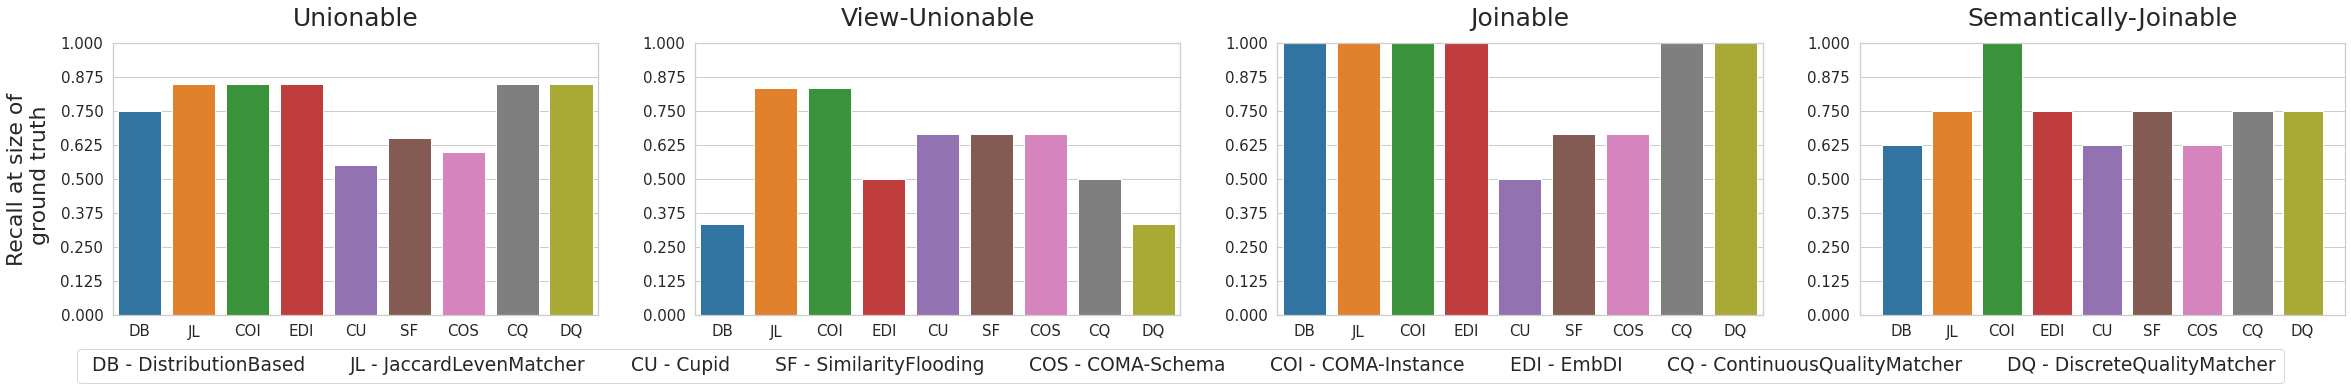

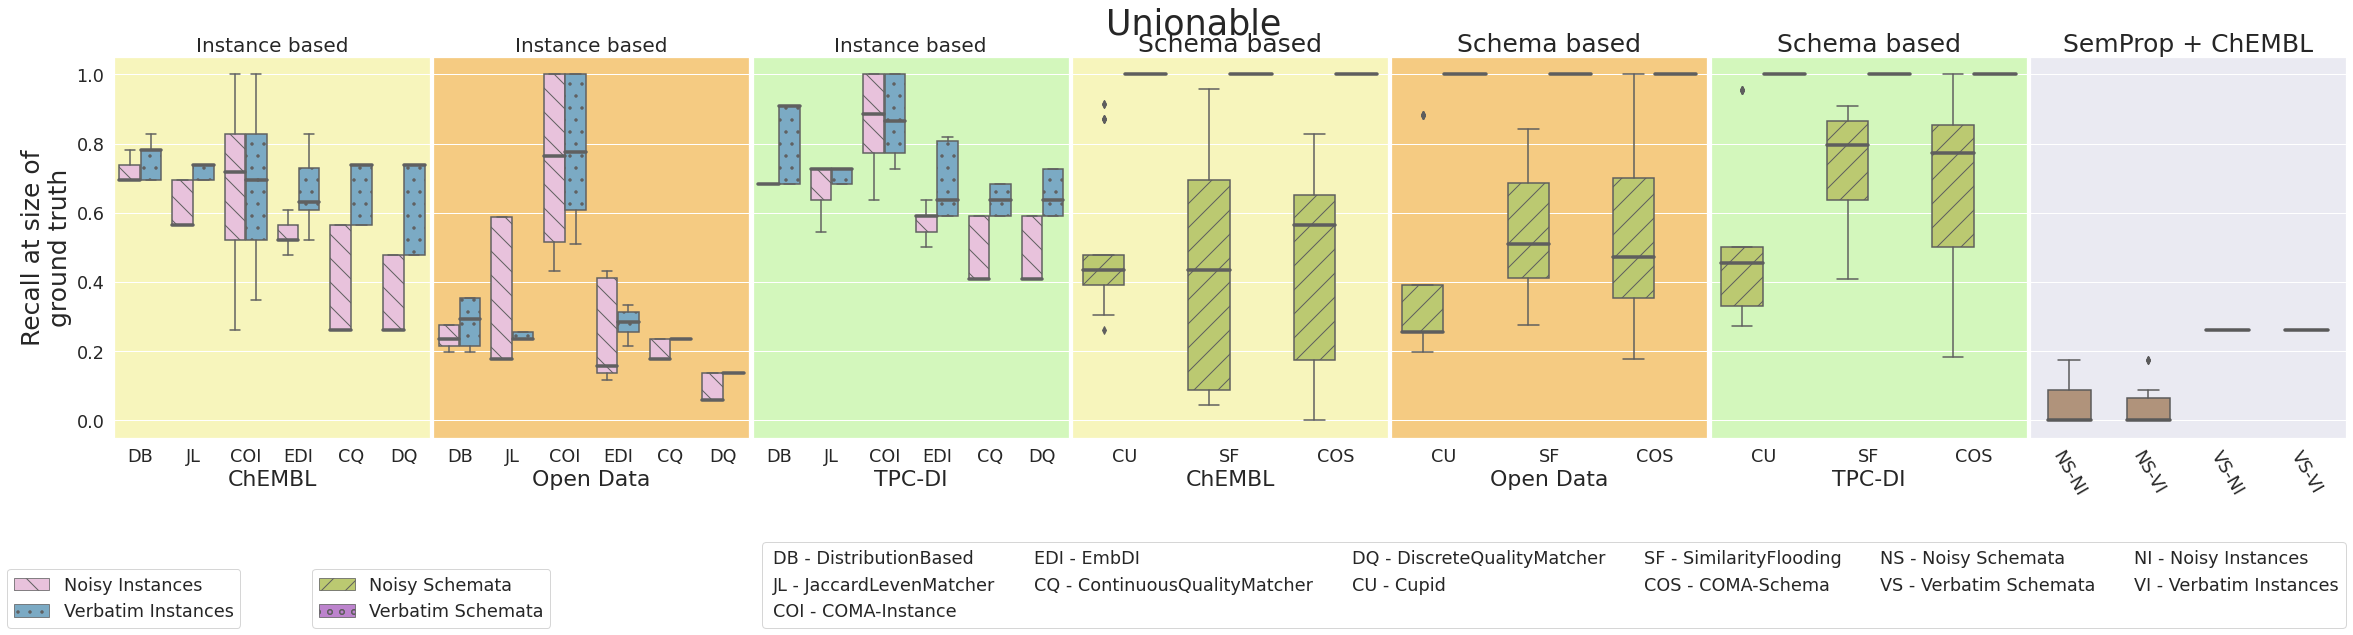

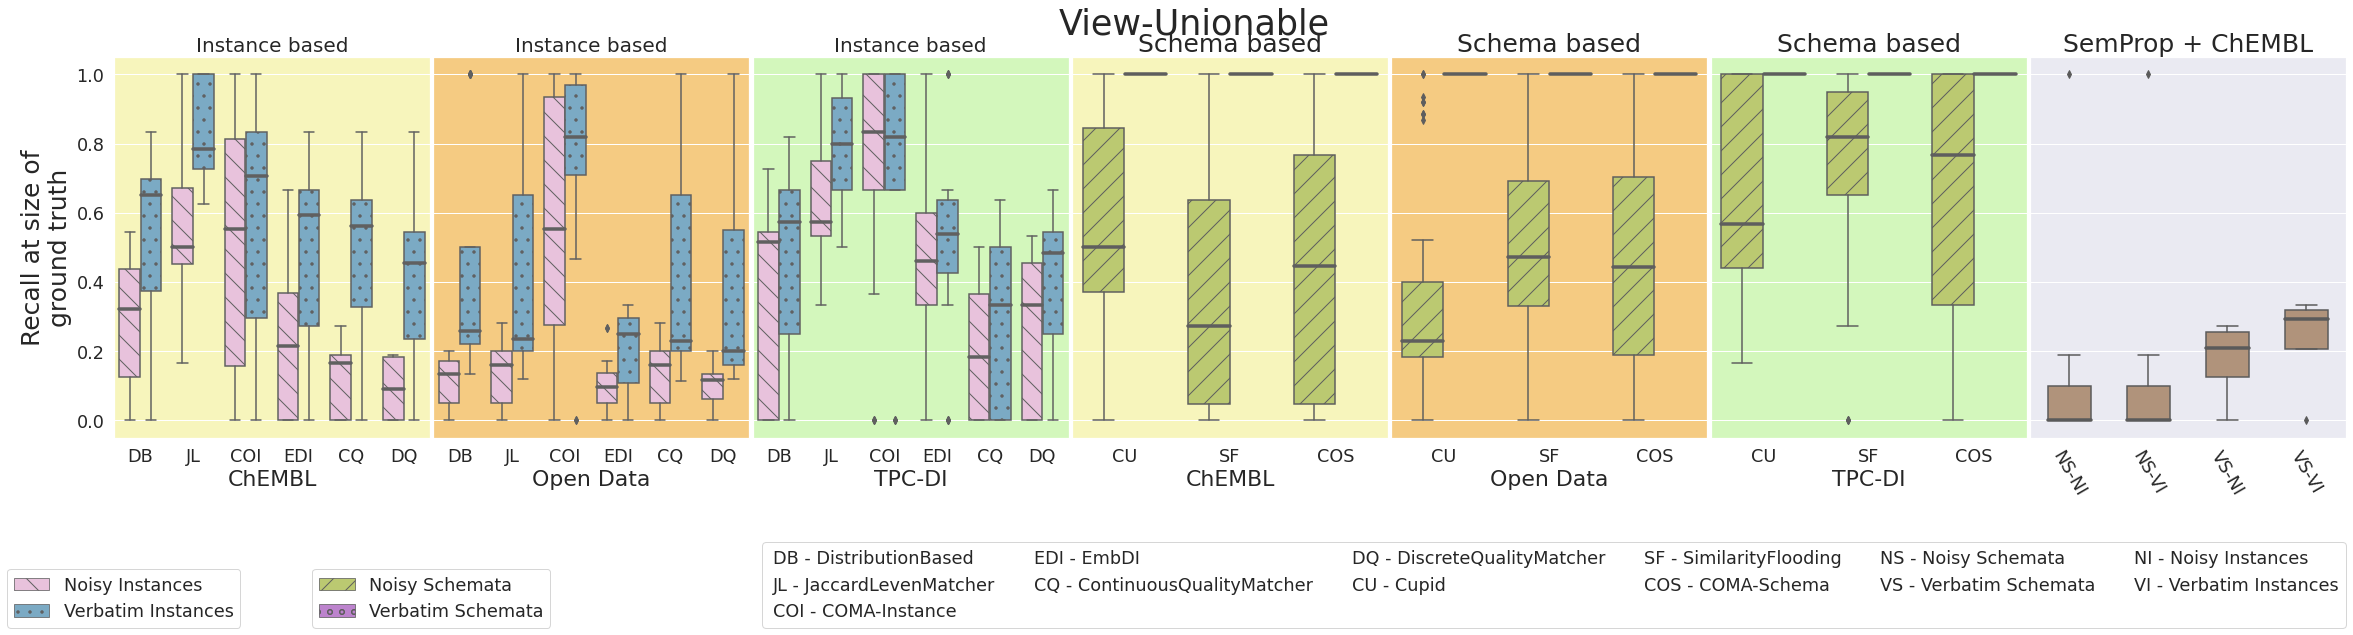

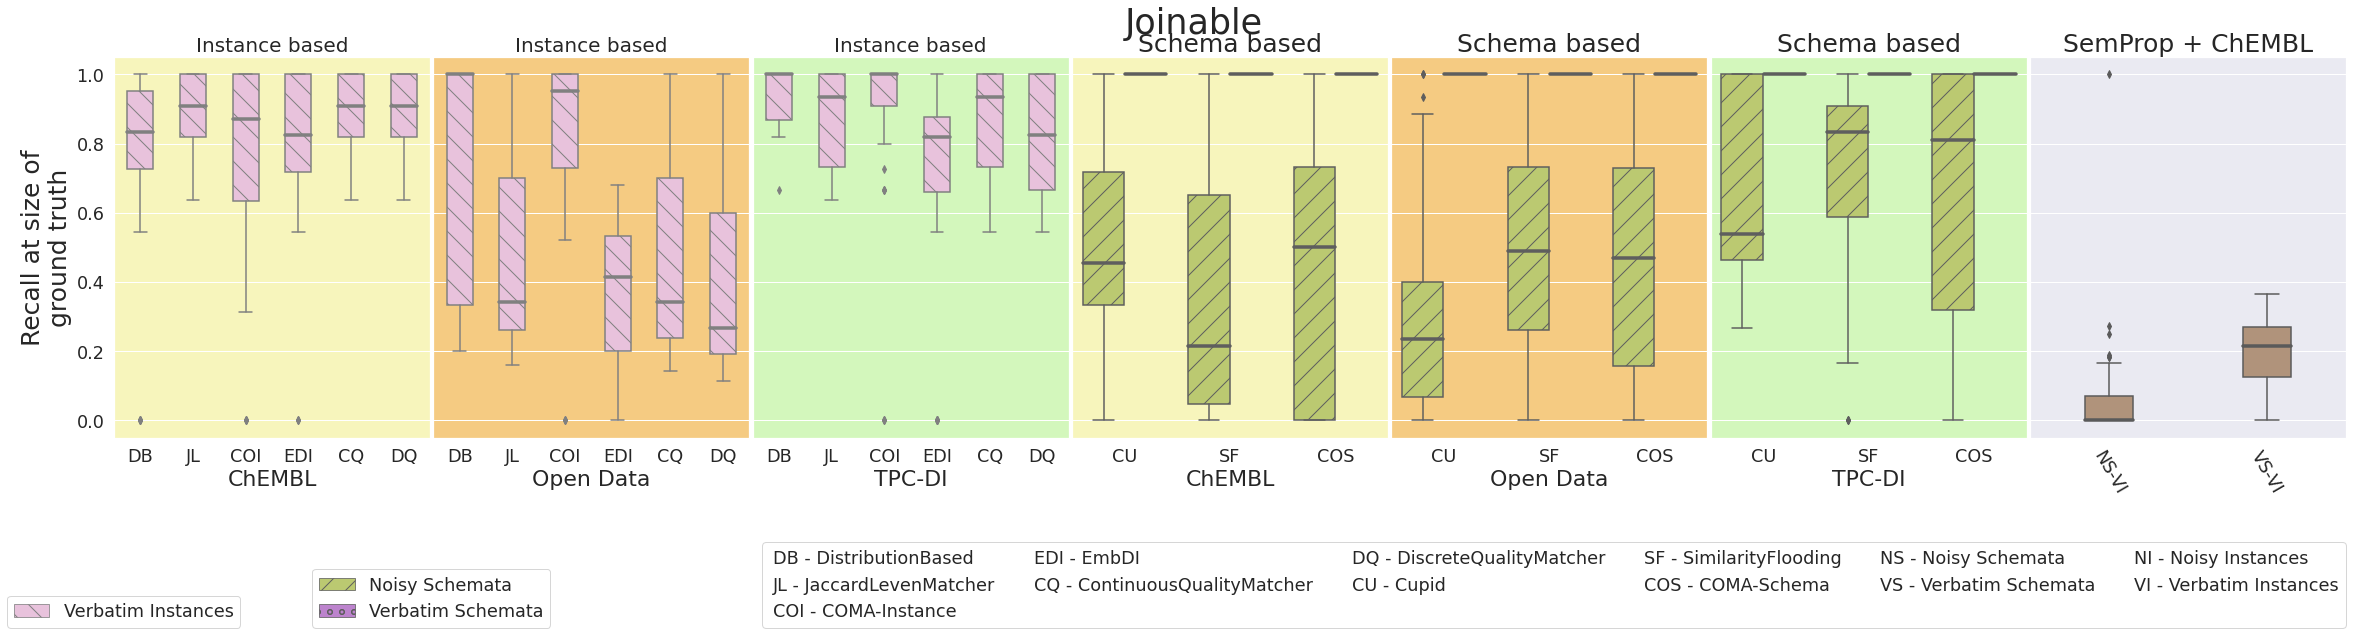

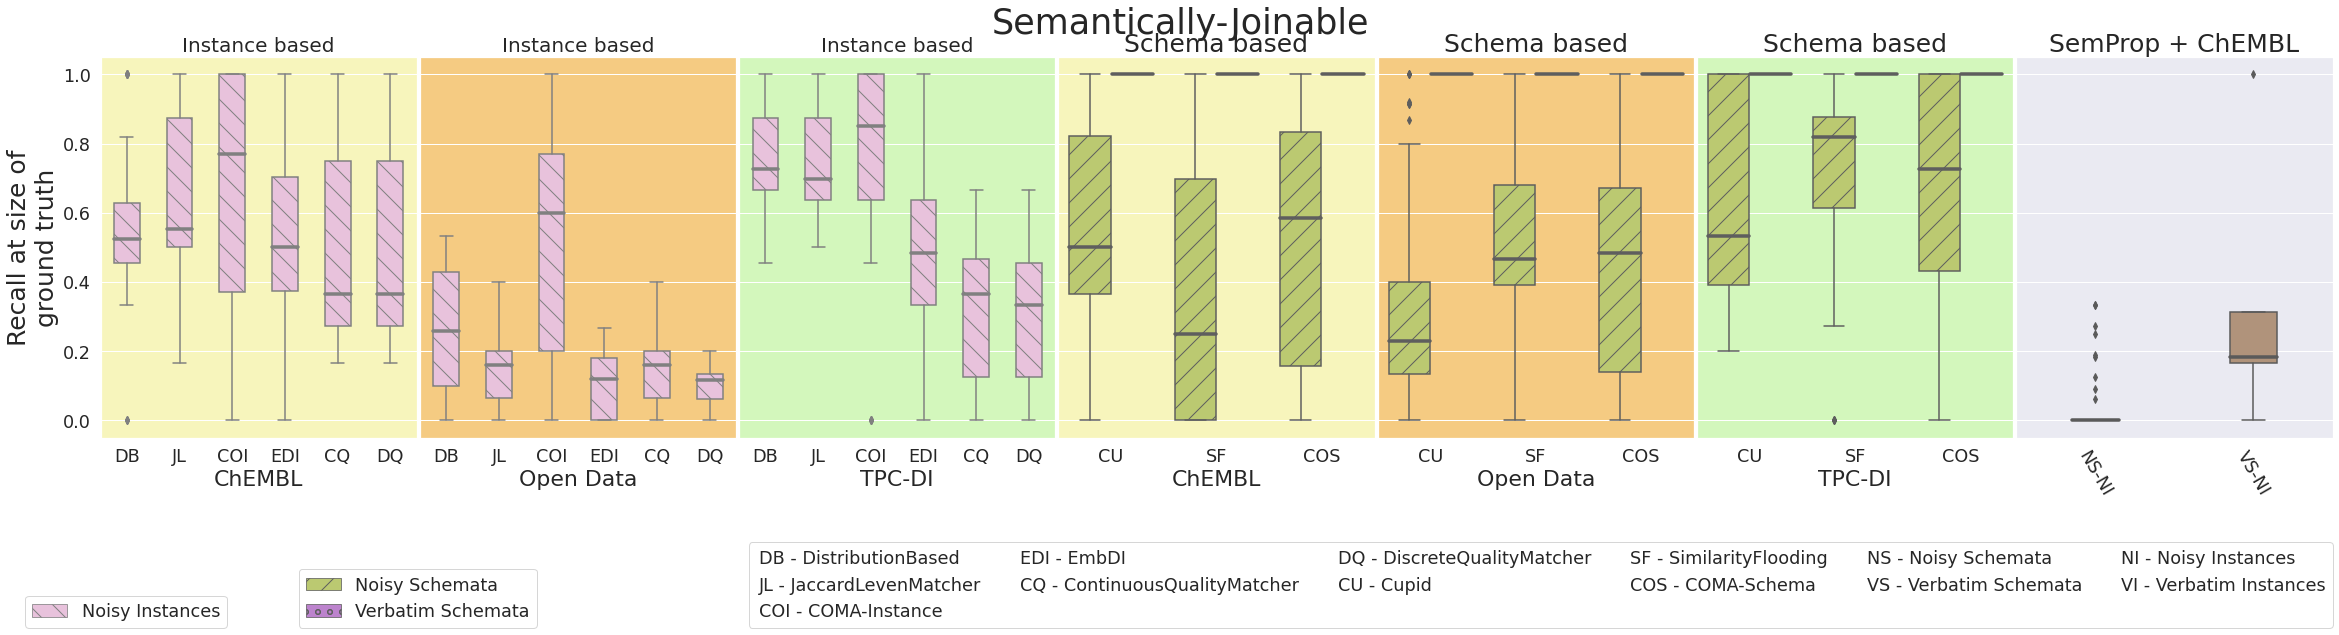

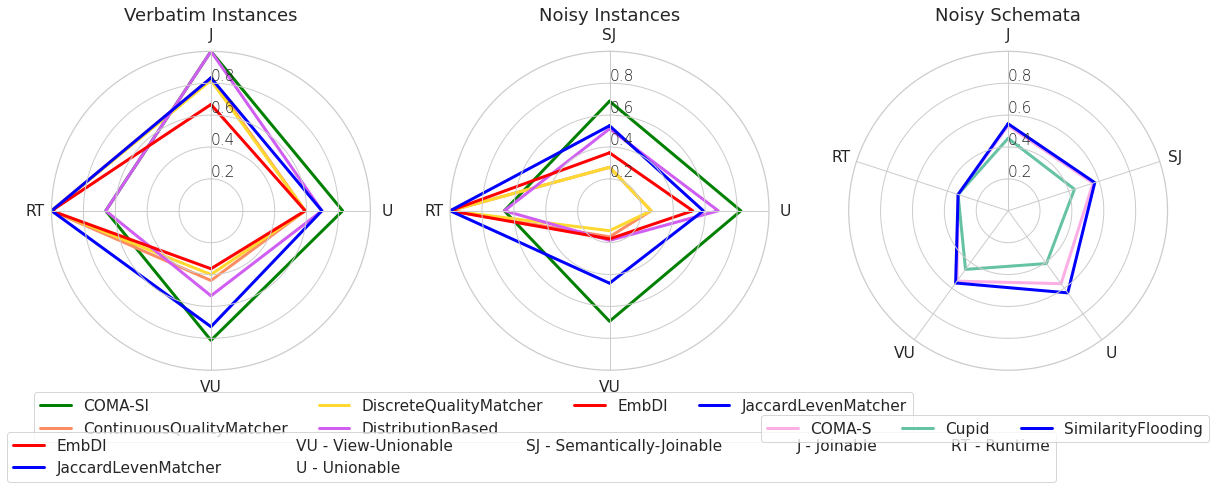

In [22]:
df = df1
title1 = "Recall at size of\n ground truth"
title2 = "F1-Score"
barplots_one_row(df, title1)

sns.set(style="darkgrid", font_scale=1.6)
for i, c in enumerate(config):
    final_plots_one_row(c)

sns.set(style="whitegrid", font_scale=1.6)
print_spider_plot(best_rec_gnd_pd)